In [32]:
from dotenv import load_dotenv
import openai
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
load_dotenv()

Matplotlib is building the font cache; this may take a moment.


True

In [4]:
def get_embedding(text):
    response = openai.embeddings.create(
        input=text,
        model="text-embedding-3-small"
    )
    return response.data[0].embedding

## Categories embeddings


In [8]:
import os
categories = os.listdir("categories")
cat_list = []
for category in categories:
    with open(f"categories/{category}", "r", encoding="utf-8") as f:
        description = f.read()
        # first line is the category name
        category_name = description.split("\n")[0]
        print(category_name)
        description = "\n".join(description.split("\n")[1:])
        print(description)
        embedding = get_embedding(description)
        print(embedding)
        cat_list.append({"Category": category_name, "Embedding": embedding})
        print("-"*100)
cat = pd.DataFrame(cat_list)
cat.to_csv("data/categories-embeddings.csv", index=False)
cat

Veille juridique et conformité réglementaire

La veille juridique et conformité réglementaire consiste à surveiller en permanence les évolutions législatives et réglementaires afin de garantir que l'entreprise respecte toutes les obligations légales en vigueur. Cela implique l'analyse des nouvelles lois, décrets et normes, l'évaluation de leur impact sur les activités de l'entreprise, et la mise en place de mesures pour assurer la conformité continue.

Exemples :

Surveiller les modifications du Code du travail pour adapter les contrats de travail et les politiques RH.
Analyser les nouvelles réglementations environnementales pour assurer la conformité des processus de production.
Mettre à jour les procédures internes suite à l'adoption d'une nouvelle loi sur la protection des consommateurs.
[0.009433439932763577, 0.04036536067724228, 0.02247471921145916, -0.032619114965200424, 0.011640588752925396, 0.009099184535443783, 0.039686236530542374, -0.01732824184000492, 0.015439432114362717, 

,Category,Embedding
0,Veille juridique et conformité réglementaire,"[0.009433439932763577, 0.04036536067724228, 0...."
1,Conformité RGPD,"[0.020328324288129807, 0.02194862626492977, 0...."
2,Audit juridique et conformité interne,"[-0.04400766268372536, 0.022344820201396942, 0..."
3,Assistance en propriété intellectuelle,"[0.03378866985440254, -0.004984613042324781, 0..."
4,Assistance en gestion de crise juridique,"[-0.0033985022455453873, 0.019704880192875862,..."


## Prompts embeddings

In [5]:
df = pd.read_csv("data/legal-prompts.csv")
df["Embedding"] = df["Prompt"].apply(get_embedding)
df.to_csv("data/legal-prompts-embeddings.csv", index=False)

In [27]:
i = 0
cos_sim = [cosine_similarity(np.array(df["Embedding"][i]).reshape(1, -1), np.array(e).reshape(1, -1))[0][0] for e in cat["Embedding"]]
idx = np.argmax(cos_sim)
print('Predicted category:', cat["Category"][idx])
print('Actual category:', df['Domain'][i])
print("Prompt:\n", df['Prompt'][i])

Predicted category: Conformité RGPD
Actual category: Veille juridique et conformité réglementaire
Prompt:
 Quelles sont les nouvelles réglementations affectant les politiques de conservation des données en France ?


In [28]:
def map_prompt_to_category(embedding):
    cos_sim = [cosine_similarity(np.array(embedding).reshape(1, -1), np.array(e).reshape(1, -1))[0][0] for e in cat["Embedding"]]
    idx = np.argmax(cos_sim)
    return cat["Category"][idx]

In [29]:
map_prompt_to_category(df["Embedding"][0])


'Conformité RGPD'

Map each prompt to a category

In [13]:
df['Domain'].unique()

array(['Veille juridique et conformité réglementaire', 'Conformité RGPD',
       'Audit juridique et conformité interne',
       'Assistance en propriété intellectuelle',
       'Assistance en gestion de crise juridique'], dtype=object)

In [15]:
cat['Category'].unique()

array(['Veille juridique et conformité réglementaire', 'Conformité RGPD',
       'Audit juridique et conformité interne',
       'Assistance en propriété intellectuelle',
       'Assistance en gestion de crise juridique'], dtype=object)

In [18]:
# Checking that the categories and domains are the same
for i in range(len(cat['Category'].unique())):
    print(df['Domain'].unique()[i] == cat['Category'].unique()[i])
    print("-"*100)

True
----------------------------------------------------------------------------------------------------
True
----------------------------------------------------------------------------------------------------
True
----------------------------------------------------------------------------------------------------
True
----------------------------------------------------------------------------------------------------
True
----------------------------------------------------------------------------------------------------


In [35]:
df['Domain'].value_counts()

Domain
Veille juridique et conformité réglementaire    20
Conformité RGPD                                 20
Audit juridique et conformité interne           20
Assistance en propriété intellectuelle          20
Assistance en gestion de crise juridique        20
Name: count, dtype: int64

Store predicted category in a new column

In [36]:
df['Category_predicted'] = df['Embedding'].apply(lambda x: map_prompt_to_category(x))
df.to_csv("data/legal-prompts-embeddings-with-category.csv", index=False)
df

,Domain,Prompt,Embedding,Category_predicted
0,Veille juridique et conformité réglementaire,Quelles sont les nouvelles réglementations aff...,"[0.042211465537548065, 0.025845110416412354, 0...",Conformité RGPD
1,Veille juridique et conformité réglementaire,Comment la législation récente impacte-t-elle ...,"[0.02650947868824005, 0.0034941458143293858, 0...",Veille juridique et conformité réglementaire
2,Veille juridique et conformité réglementaire,Pouvez-vous résumer les principaux changements...,"[0.001008874154649675, 0.031483348459005356, -...",Veille juridique et conformité réglementaire
3,Veille juridique et conformité réglementaire,Y a-t-il des échéances de conformité à venir d...,"[0.027727236971259117, 0.0445898175239563, 0.0...",Veille juridique et conformité réglementaire
4,Veille juridique et conformité réglementaire,Quelles sont les sanctions pour non-conformité...,"[-0.024426227435469627, 0.025702686980366707, ...",Veille juridique et conformité réglementaire
...,...,...,...,...
95,Assistance en gestion de crise juridique,Quelles options d'assurance sont disponibles p...,"[0.02813781425356865, 0.028478583320975304, 0....",Assistance en gestion de crise juridique
96,Assistance en gestion de crise juridique,Comment gérer la confidentialité pendant une c...,"[0.022019190713763237, 0.02746012806892395, 0....",Assistance en gestion de crise juridique
97,Assistance en gestion de crise juridique,Quel est le rôle des modes alternatifs de réso...,"[-0.02505207620561123, 0.030413415282964706, 0...",Assistance en gestion de crise juridique
98,Assistance en gestion de crise juridique,Comment pouvons-nous soutenir les employés imp...,"[0.018304232507944107, 0.033235326409339905, 0...",Assistance en gestion de crise juridique


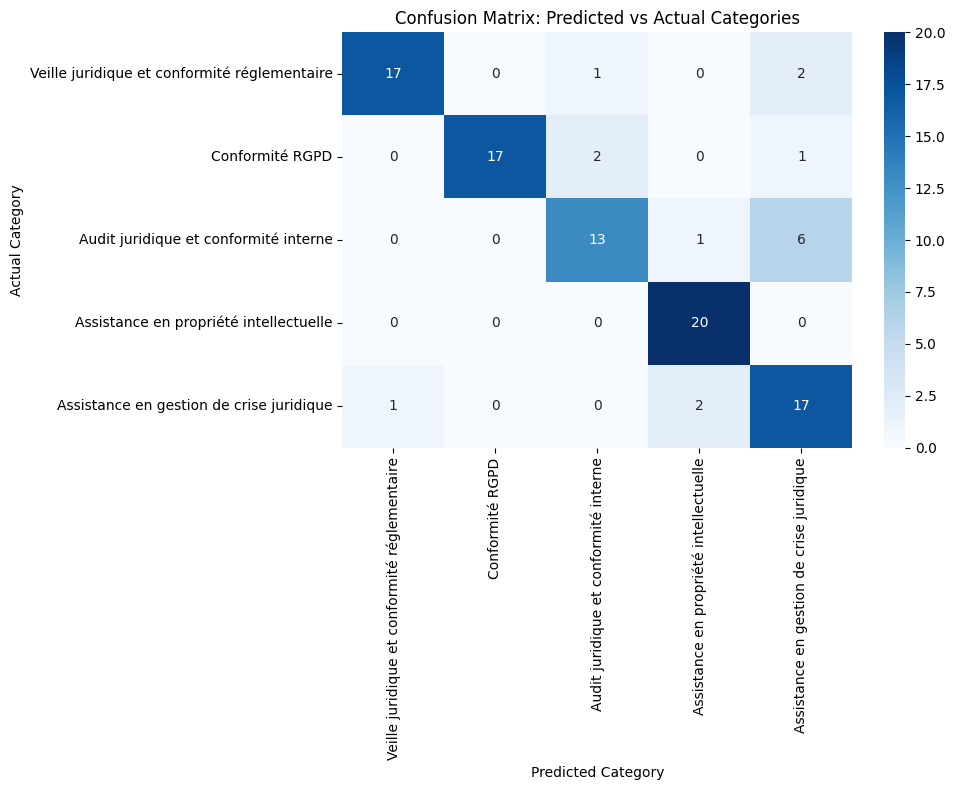

Accuracy: 84.00%


In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(df['Domain'], df['Category_predicted'])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cat['Category'].unique(), 
            yticklabels=cat['Category'].unique())
plt.title('Confusion Matrix: Predicted vs Actual Categories')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.tight_layout()
plt.show()

# Calculate accuracy
accuracy = (df['Domain'] == df['Category_predicted']).mean()
print(f"Accuracy: {accuracy:.2%}")